# Task: PPG Signal Processing, Dataset Merging, Visualization, and Predictive Modeling

### 1. Merge Data:
o For each subject, merge their PPG signal data with their corresponding HR and HRV
values from the master dataset based on Subject_ID.
o Save each merged dataset as a new CSV file (one per subject) in a separate folder.

In [12]:
import pandas as pd
import os
import glob


master_df = pd.read_csv(r"D:\iiitnr\Assignment\assignment3\master_dataset.csv")

ppg_files = glob.glob(r"D:\iiitnr\Assignment\assignment3\ppg_subjects\*.csv")
ppg_files.sort()


output_folder = r"D:\iiitnr\Assignment\assignment3\merged_subjects"

os.makedirs(output_folder, exist_ok=True)

for file in ppg_files:
    ppg_df = pd.read_csv(file)
    subject_id = ppg_df['Subject_ID'].iloc[0]
    
    
    metadata = master_df[master_df['Subject_ID'] == subject_id]
    
    merged_df = ppg_df.merge(metadata, on='Subject_ID', how='left')
    

    merged_df.to_csv(f"{output_folder}/merged_{subject_id}.csv", index=False)

    print(f"Saved merged file for Subject_ID: {subject_id}")


Saved merged file for Subject_ID: 1
Saved merged file for Subject_ID: 2
Saved merged file for Subject_ID: 3
Saved merged file for Subject_ID: 4
Saved merged file for Subject_ID: 5
Saved merged file for Subject_ID: 6
Saved merged file for Subject_ID: 7
Saved merged file for Subject_ID: 8
Saved merged file for Subject_ID: 9
Saved merged file for Subject_ID: 10
Saved merged file for Subject_ID: 11
Saved merged file for Subject_ID: 12
Saved merged file for Subject_ID: 13
Saved merged file for Subject_ID: 14
Saved merged file for Subject_ID: 15
Saved merged file for Subject_ID: 16
Saved merged file for Subject_ID: 17
Saved merged file for Subject_ID: 18
Saved merged file for Subject_ID: 19
Saved merged file for Subject_ID: 20


### 2. Visualize Merged PPG Data:
o For each merged subject CSV file, plot an interactive line chart using Plotly showing:
▪ Time vs PPG
▪ Include title indicating Subject_ID

In [13]:
import plotly.express as px
import pandas as pd
import glob

files = glob.glob(r"D:\iiitnr\Assignment\assignment3\merged_subjects\*.csv")
files.sort()

for file in files:
    merged_df = pd.read_csv(file)
    subject_id = merged_df['Subject_ID'].iloc[0]
    fig = px.line(merged_df, x='Time', y='PPG', title=f'Subject {subject_id} - PPG Signal')
    fig.show()

### 3. Combine and Split Data:
o Combine all the merged subject datasets into a single DataFrame.
o Split this combined dataset into a train and test set (80%-20% split).

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import glob

merged_files = glob.glob(r"D:\iiitnr\Assignment\assignment3\merged_subjects\*.csv")

full_data = pd.concat([pd.read_csv(f) for f in merged_files], ignore_index=True)

X = full_data[['PPG', 'HRV', 'Time']]
y = full_data['HR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Build and Evaluate Models:
o Implement any 4 different regression models (e.g. Linear Regression, Decision Tree
Regressor, Random Forest Regressor, KNN Regressor, etc.) to predict HR based on
available features (PPG, HRV, Time).

### a-> LinearRegression model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")


MAE: 7.8361742692436795, MSE: 74.45730354337586, RMSE: 8.628864557018835, R2: 0.38164034424128346


### B-> Decision Tree Regresssor Model

In [22]:
from sklearn.tree import DecisionTreeRegressor
d_model = DecisionTreeRegressor(random_state=42)
d_model.fit(X_train, y_train)
d_pred = d_model.predict(X_test)
d_mae = mean_absolute_error(y_test, d_pred)
d_mse = mean_squared_error(y_test, d_pred)
d_rmse = np.sqrt(d_mse)
d_r2 = r2_score(y_test, d_pred)
print(" Decision Tree Results")
print(f"MAE: {d_mae}, MSE: {d_mse}, RMSE: {d_rmse}, R2: {d_r2}")

 Decision Tree Results
MAE: 0.0, MSE: 0.0, RMSE: 0.0, R2: 1.0


### C->Random Forest Regressor Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(random_state=42)
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
RF_mae = mean_absolute_error(y_test, RF_pred)
RF_mse = mean_squared_error(y_test, RF_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(y_test, RF_pred)
print(" Random Forest Results")
print(f"MAE: {RF_mae}, MSE: {RF_mse}, RMSE: {RF_rmse}, R2: {RF_r2}")

 Random Forest Results
MAE: 0.0, MSE: 0.0, RMSE: 0.0, R2: 1.0


### D-> KNeighborsRegressor model

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_pred)

print("KNN Regressor Results")
print(f"MAE: {knn_mae}, MSE: {knn_mse}, RMSE: {knn_rmse}, R2: {knn_r2}")

KNN Regressor Results
MAE: 0.07204999999999992, MSE: 0.0974899999999999, RMSE: 0.31223388669393315, R2: 0.9991903563522845


### o For each model:
### ▪ Train it on the training data.
### ▪ Evaluate it on the test data.
### ▪ Plot error metrics like MAE, MSE, RMSE, R2 score.
### ▪ Create visualizations like:
▪ Actual vs Predicted values plot
▪ Residuals plot
▪ Model comparison bar chart for error metrics

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


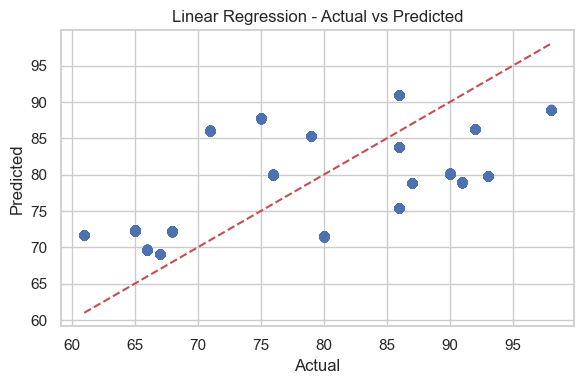

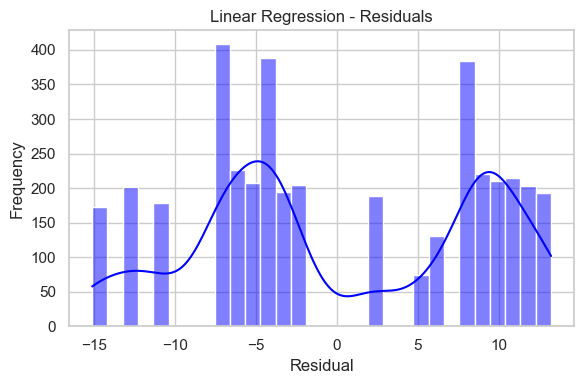

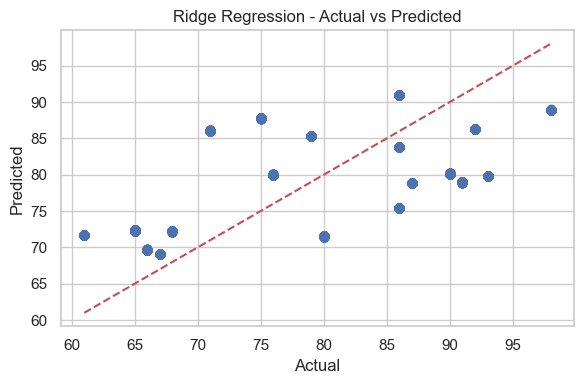

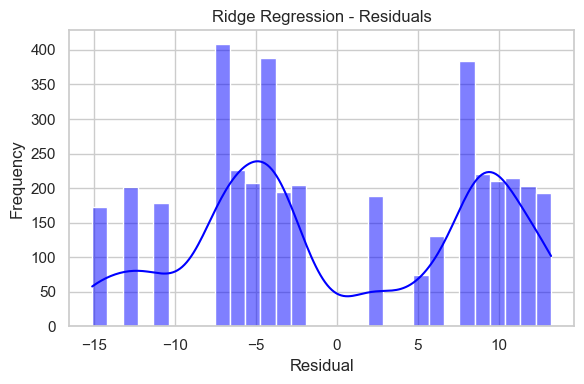

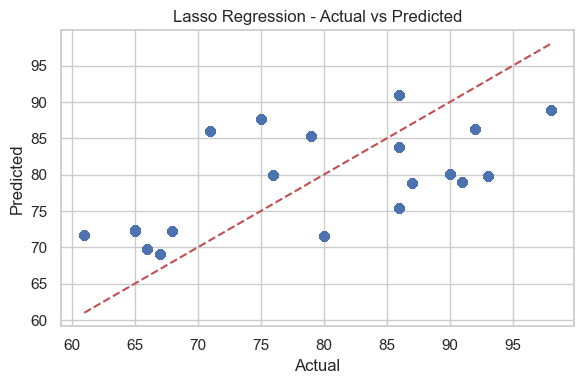

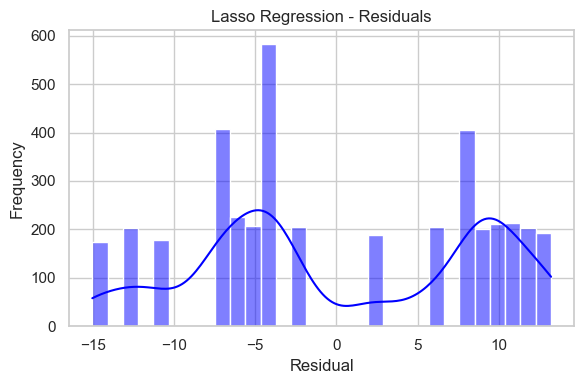

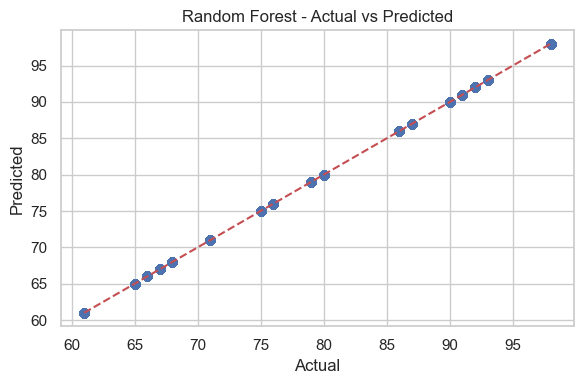

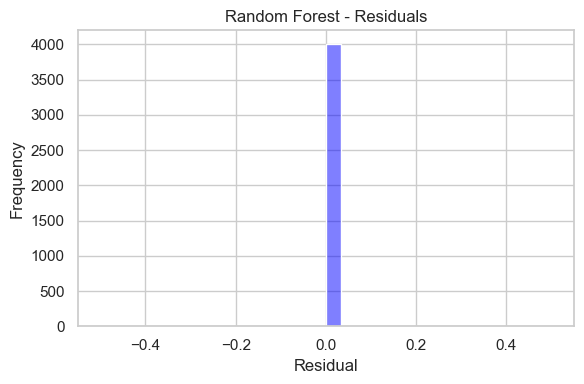

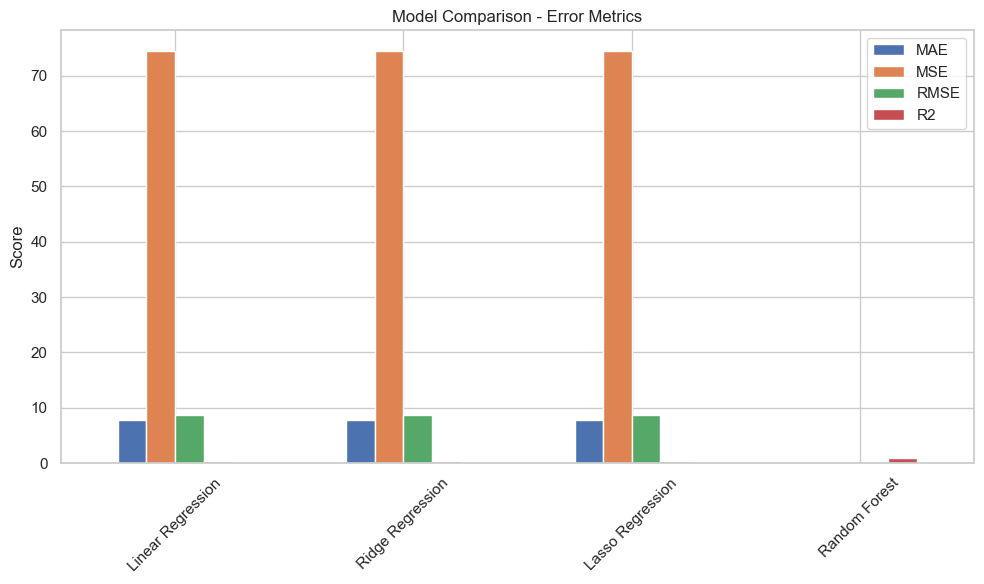

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor()
}


results = {}


sns.set(style="whitegrid")


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")
    plt.tight_layout()
    plt.show()


    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30, color='blue')
    plt.title(f"{name} - Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison - Error Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

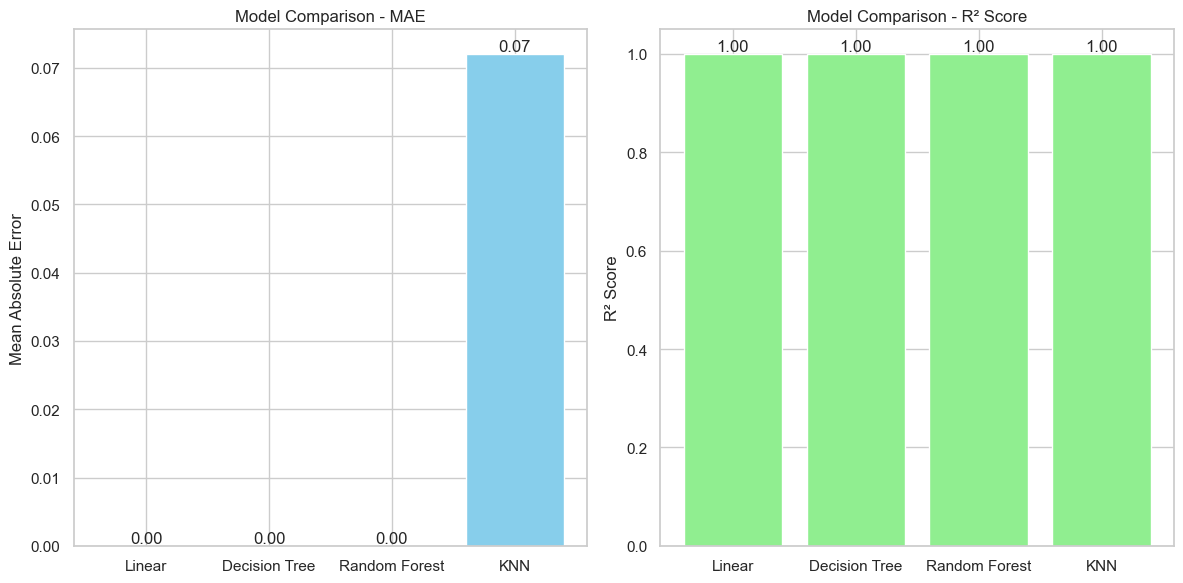

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear', 'Decision Tree', 'Random Forest', 'KNN']
mae_scores = [mae, d_mae, RF_mae, knn_mae]
mse_scores = [mse, d_mse, RF_mse, knn_mse]
rmse_scores = [rmse, d_rmse, RF_rmse, knn_rmse]
r2_scores = [r2, d_r2, RF_r2, knn_r2]

x = range(len(models))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mae_scores, color='skyblue')
plt.title("Model Comparison - MAE")

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='lightgreen')
plt.title("Model Comparison - R² Score")

plt.tight_layout()
plt.show()